In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# EDA

## One user data

In [2]:
df = pd.read_csv("./data/train/data_10.csv")
df.describe()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
count,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000
mean,12.584414,12.074901,10.141143,0.233549,0.284104,0.278966,0.203381,0.057351
std,3.332733,1.929099,1.159822,0.423123,0.451024,0.448528,0.402547,0.232532
min,5.261948,7.656236,7.146009,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.639656,10.664572,9.641442,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.760205,11.438726,10.191205,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.115468,13.587638,10.865063,0.000000,1.000000,1.000000,0.000000,0.000000
max,19.792696,16.279704,14.352830,1.000000,1.000000,1.000000,1.000000,1.000000


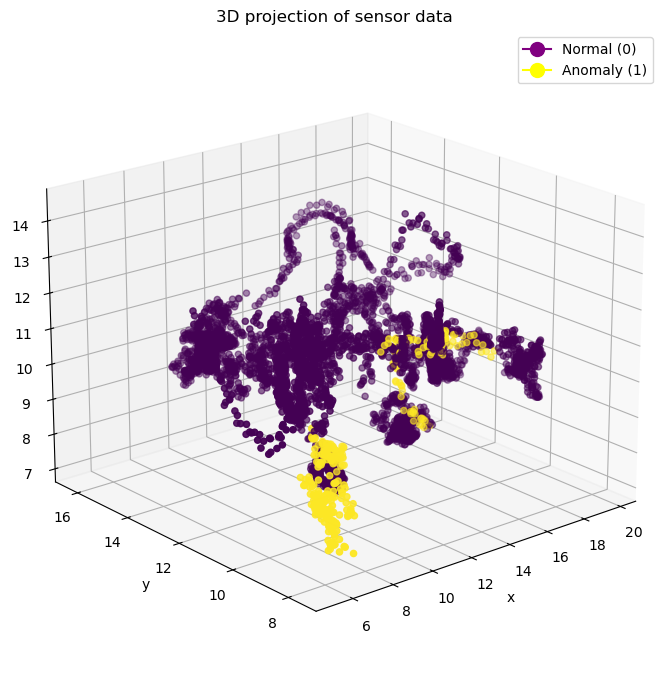

In [3]:
from matplotlib.lines import Line2D

intify = df['anomaly'].astype(int)

fig = plt.figure(figsize=(7,7), layout='tight')
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.scatter(df['x'], df['y'], df['z'], c=df['anomaly'])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel('z')
ax1.set_title('3D projection of sensor data')

legend_elements = [Line2D([0], [0], marker='o', color='purple', label='Normal (0)', 
                        markersize=10),
                   Line2D([0], [0], marker='o', color='yellow', label='Anomaly (1)', 
                        markersize=10)]

# Add the legend to the plot
ax1.legend(handles=legend_elements, loc='upper right')


ax1.view_init(elev=20., azim=-130)

In [4]:
# combining OH encoding for sensor data
sensor1 = np.array(df['010-000-024-033']).reshape(-1, 1)
sensor2 = np.array(df['010-000-030-096']).reshape(-1, 1)
sensor3 = np.array(df['020-000-032-221']).reshape(-1, 1)
sensor4 = np.array(df['020-000-033-111']).reshape(-1, 1)

sensor_oh = np.concatenate([sensor1, sensor2, sensor3, sensor4], axis=1)
sensor_idx = [np.argmax(i) for i in sensor_oh]


              x          y          z  010-000-024-033  010-000-030-096  \
3     13.110654  10.208509  10.591707              0.0              1.0   
7     13.237308  10.412721  10.390196              0.0              1.0   
10    13.324849  10.725250  10.453700              0.0              1.0   
14    13.415006  11.155213  10.659015              0.0              1.0   
19    13.574462  11.576481  10.992203              0.0              1.0   
...         ...        ...        ...              ...              ...   
6019  14.914769  13.778870  11.770834              0.0              1.0   
6022  15.136605  13.842691  12.317622              0.0              1.0   
6025  15.359995  14.087712  12.329216              0.0              1.0   
6028  15.548757  14.383471  12.485893              0.0              1.0   
6031  15.586999  14.505781  12.649405              0.0              1.0   

      020-000-032-221  020-000-033-111  anomaly  
3                 0.0              0.0      0.0  

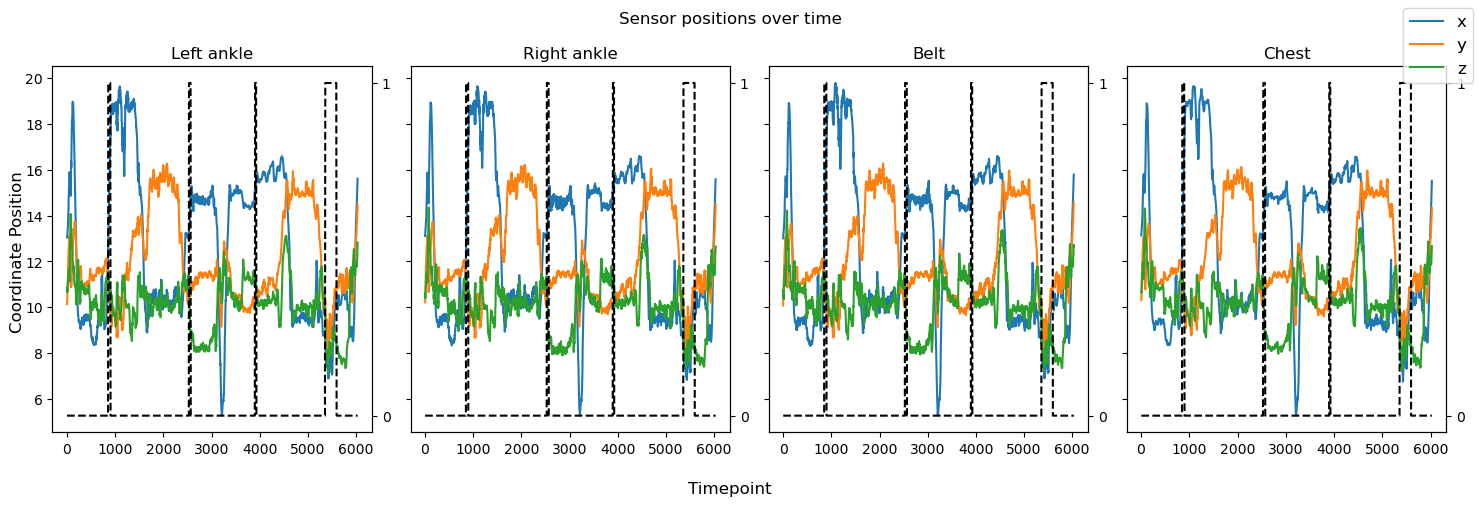

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharey=True, layout='tight')

sensor_df = [df[df['010-000-024-033'] == 1], 
                df[df['010-000-030-096'] == 1],
                df[df['020-000-032-221'] == 1],
                df[df['020-000-033-111'] == 1]]

print(df[df['010-000-030-096'] == 1])

sensor_type = ['Left ankle', 'Right ankle', 'Belt', 'Chest']

for i in range(len(sensor_df)):
    ax[i].plot(sensor_df[i]['x'], label="x")
    ax[i].plot(sensor_df[i]['y'], label="y")
    ax[i].plot(sensor_df[i]['z'], label="z")

    ax[i].set_title(f"{sensor_type[i]}")
    ax2 = ax[i].twinx()
    ax2.plot(sensor_df[i]['anomaly'], c='black', linestyle="dashed")
    ax2.set_yticks([0, 1])
fig.supxlabel("Timepoint")
fig.supylabel("Coordinate Position")
fig.suptitle("Sensor positions over time")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', prop={'size': 12})


# ax.legend()



## Aggregating user data

In [6]:
combined_list = []
for dir in os.listdir("./data/train"):
    combined_list.append(pd.read_csv(f"./data/train/{dir}"))

combined_train_df = pd.concat(combined_list)
combined_train_df

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,24.360715,14.661491,15.061292,0.0,0.0,0.0,1.0,0.0
1,24.345720,14.677384,15.080112,0.0,0.0,1.0,0.0,0.0
2,24.315322,14.641433,15.020421,1.0,0.0,0.0,0.0,0.0
3,24.305469,14.663497,15.005379,0.0,1.0,0.0,0.0,0.0
4,24.273169,14.633127,14.865332,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8864,15.086639,14.924325,12.932729,0.0,1.0,0.0,0.0,0.0
8865,15.223613,14.914838,13.023995,1.0,0.0,0.0,0.0,0.0
8866,15.256996,14.926272,13.302165,0.0,0.0,0.0,1.0,0.0
8867,15.318133,14.962508,12.995632,0.0,1.0,0.0,0.0,0.0


In [7]:
combined_list = []
for dir in os.listdir("./data/test"):
    combined_list.append(pd.read_csv(f"./data/test/{dir}"))

combined_test_df = pd.concat(combined_list)
combined_test_df

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,6.504078,12.789729,9.447159,1.0,0.0,0.0,0.0,0.0
1,6.472978,12.675193,9.622985,0.0,0.0,1.0,0.0,0.0
2,6.452725,12.625970,9.325761,0.0,1.0,0.0,0.0,0.0
3,6.426322,12.610741,9.753680,0.0,0.0,0.0,1.0,0.0
4,6.401717,12.602613,9.780900,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5641,8.848450,12.325300,10.712311,0.0,1.0,0.0,0.0,0.0
5642,8.868416,12.196157,11.130225,0.0,0.0,0.0,1.0,0.0
5643,8.816918,12.188862,10.833978,1.0,0.0,0.0,0.0,0.0
5644,8.879654,12.211562,11.045605,0.0,0.0,1.0,0.0,0.0
